In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import binom, beta
import preliz as pz

Text(-0.04, 0.4, 'P(X=x)')

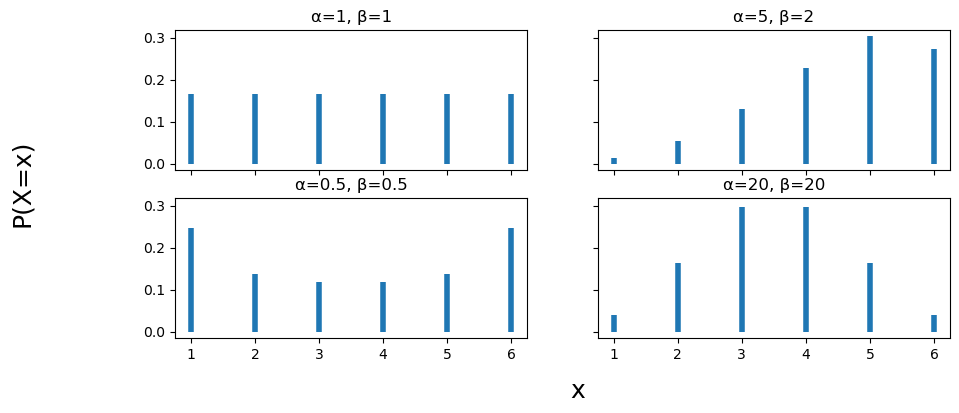

In [2]:
n = 5


x = np.arange(0, 6)

fig, axes = plt.subplots(2, 2, figsize=(10, 4), sharey=True, sharex=True)
axes = np.ravel(axes)

for ax, (α, β) in zip(axes, ((1, 1), (5, 2), (0.5, 0.5), (20, 20))): 
    dist_pmf = binom(n, x) * (beta(x+α, n-x+β) / beta(α, β))
    ax.vlines(x, 0, dist_pmf, colors='C0', lw=4)
    ax.set_title(f"α={α}, β={β}")
    ax.set_xticks(x)
    ax.set_xticklabels(x+1)
fig.text(0.52, -0.04, "x", fontsize=18)
fig.text(-0.04, 0.4, "P(X=x)", fontsize=18, rotation="vertical")


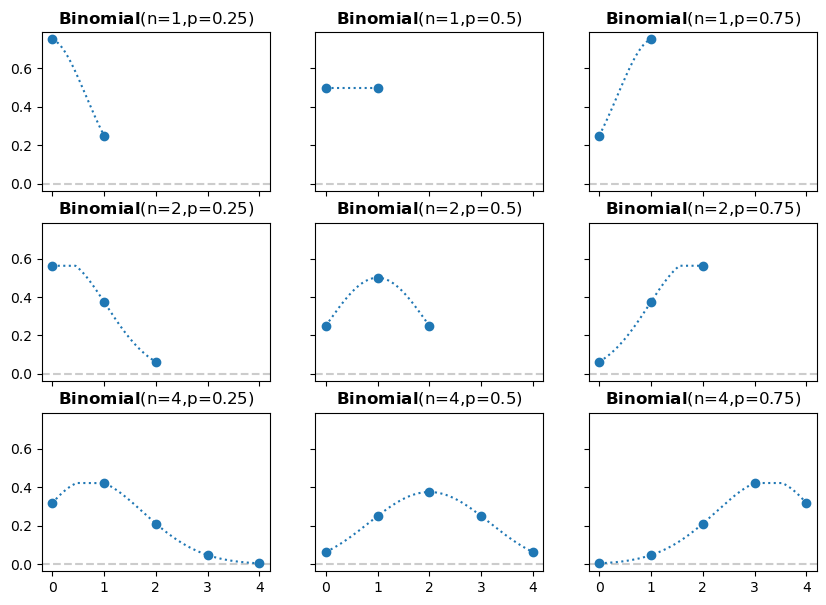

In [3]:
n_params = [1, 2, 4] # Number of trials
p_params = [0.25, 0.5, 0.75] # Probability of success

_, axes = plt.subplots(3, 3, figsize=(10, 7), sharex=True, sharey=True)
for i, n in enumerate(n_params):
    for j, p in enumerate(p_params):
        pz.Binomial(n, p).plot_pdf(legend="title", ax=axes[i, j])

In [25]:
# Define parameters
N = 1  # Number of trials
z = N  # Number of successes (z=N means all trials were successful)
theta_values = np.linspace(0, 1, 1000)  # Values for the probability parameter theta

# Compute the likelihood - binomial likelihood when z=N is just theta^N
def binomial_likelihood(theta, z, N):
    return theta**z * (1-theta)**(N-z)

likelihood = binomial_likelihood(theta_values, z, N)



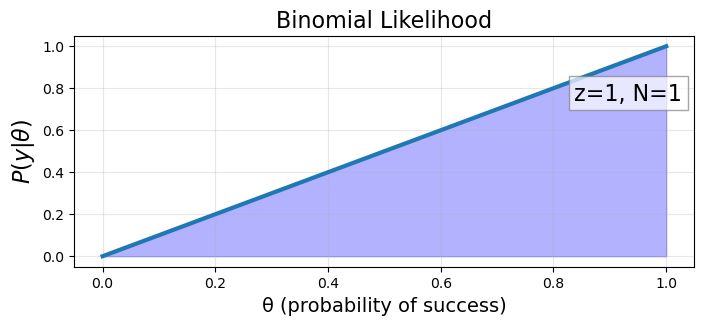

In [47]:
# Create the plot
def plot_likelihood(theta_values, z, N, show_mode=False):
    likelihood = binomial_likelihood(theta_values, z, N)
    mode = z/N

    plt.figure(figsize=(8, 3))
    plt.plot(theta_values, likelihood, 'C0', linewidth=3)
    plt.fill_between(theta_values, likelihood, alpha=0.3, color='blue')
    if show_mode:
        plt.axvline(mode, color='red', linestyle='--', alpha=0.7, label=f'Mode = {mode:.3f}')

    plt.xlabel('θ (probability of success)', fontsize=14)
    plt.ylabel(r'$P(y|\theta)$', fontsize=16)
    plt.title('Binomial Likelihood', fontsize=16)
    
    if show_mode:
        annotation_text = f'z={z}, N={N}\nMode={mode:.3f}'
    else:
        annotation_text = f'z={z}, N={N}'

    plt.text(0.98, 0.8, annotation_text, 
            transform=plt.gca().transAxes, 
            ha='right', va='top', 
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'),
            fontsize=16)

    plt.grid(alpha=0.3)
    plt.show()

plot_likelihood(theta_values, z, N)

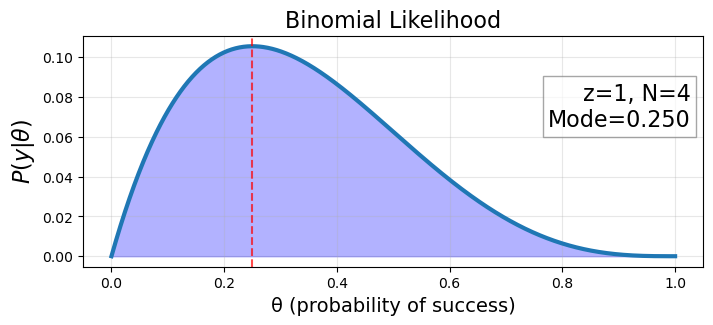

In [48]:
plot_likelihood(theta_values, 1, 4, show_mode=True)

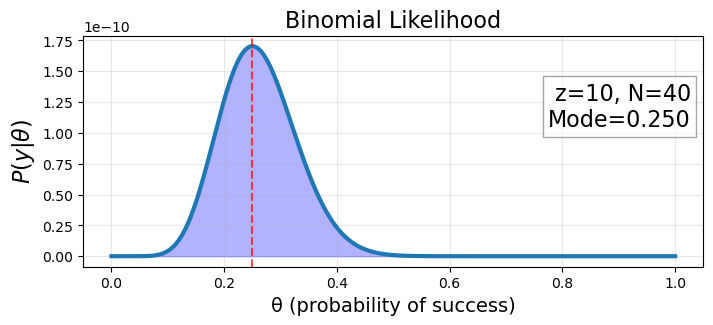

In [49]:
plot_likelihood(theta_values, 10, 40, show_mode=True)

In [ ]:
# Define a triangular prior (0 at 0 and 1, and 2 at 0.5)
def triangular_prior(theta):
    triangle_values = 2 - 4 * abs(theta - 0.5)
    return triangle_values / np.sum(triangle_values)

# Calculate the prior values
prior_values = triangular_prior(theta_values)

# Calculate the likelihood (already defined in cell 3)
z=1
N=1
likelihood = binomial_likelihood(theta_values, z, N)  # For z=N=1

# Calculate the posterior by multiplying prior and likelihood
posterior_values = prior_values * likelihood
posterior_values = posterior_values / np.sum(posterior_values)  # Normalize



In [56]:
def calc_hdi(prior_values):
    cumsum = np.cumsum(prior_values)
    hdi_min = theta_values[np.argmin(np.abs(cumsum - 0.025))]
    hdi_max = theta_values[np.argmin(np.abs(cumsum - 0.975))]
    return hdi_min, hdi_max

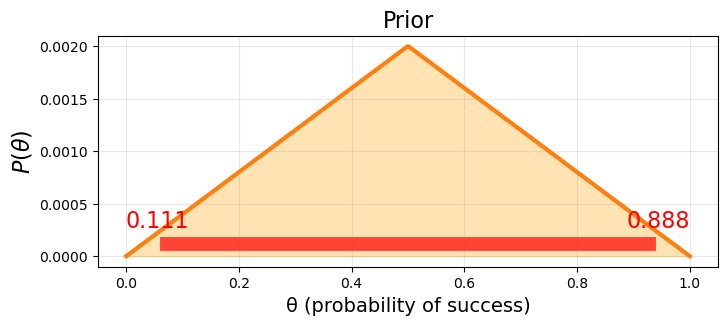

In [ ]:
def plot_prior(theta_values, prior_values, show_mode=False, show_hdi=False):    
    plt.figure(figsize=(8, 3))
    plt.plot(theta_values, prior_values, 'C1', linewidth=3)
    plt.fill_between(theta_values, prior_values, alpha=0.3, color='orange')

    if show_mode:
        mode = theta_values[np.argmax(prior_values)]
        plt.axvline(mode, color='red', linestyle='--', alpha=0.7, label=f'Mode')

        annotation_text = f'Mode={mode:.3f}'
        plt.text(0.98, 0.8, annotation_text, 
            transform=plt.gca().transAxes, 
            ha='right', va='top', 
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'),
            fontsize=16)
    
    if show_hdi:
        hdi_min, hdi_max = calc_hdi(prior_values)
        ax = plt.gca()
        hdi_height = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.1 + ax.get_ylim()[0]
        text_height = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.15 + ax.get_ylim()[0]
        plt.axhline(xmin = hdi_min, xmax = hdi_max, y = hdi_height, alpha=0.7, color='red', linewidth=10)
        plt.text(hdi_min, text_height, f'{hdi_min:.3f}', ha='right', va='bottom', color='red', fontsize=16)
        plt.text(hdi_max, text_height, f'{hdi_max:.3f}', ha='left', va='bottom', color='red', fontsize=16)

    plt.xlabel('θ (probability of success)', fontsize=14)
    plt.ylabel(r'$P(\theta)$', fontsize=16)
    plt.title('Prior', fontsize=16)
    plt.grid(alpha=0.3)
    plt.show()

plot_prior(theta_values, prior_values)

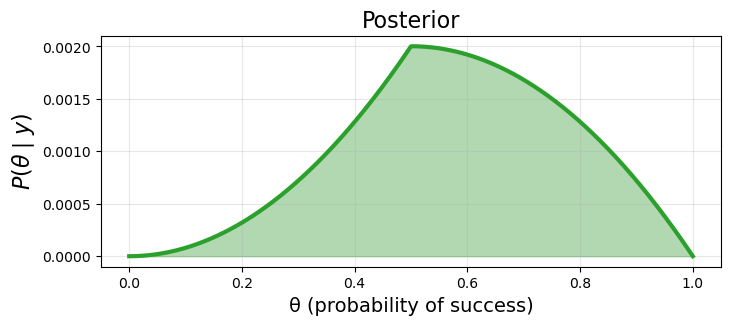

In [63]:
def plot_posterior(theta_values, prior, likelihood, show_mode=False, show_hdi=False):
    posterior = prior * likelihood
    posterior = posterior / np.sum(posterior)  # Normalize

    plt.figure(figsize=(8, 3))
    plt.plot(theta_values, posterior, 'C2', linewidth=3)
    plt.fill_between(theta_values, posterior, alpha=0.3, color='green')

    if show_mode:
        mode = theta_values[np.argmax(posterior)]
        plt.axvline(mode, color='red', linestyle='--', alpha=0.7, label=f'Mode')

        annotation_text = f'Mode={mode:.3f}'
        plt.text(0.98, 0.8, annotation_text, 
            transform=plt.gca().transAxes, 
            ha='right', va='top', 
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'),
            fontsize=16)
        
    if show_hdi:
        hdi_min, hdi_max = calc_hdi(posterior)
        ax = plt.gca()
        hdi_height = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.1 + ax.get_ylim()[0]
        text_height = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.15 + ax.get_ylim()[0]
        plt.axhline(xmin = hdi_min, xmax = hdi_max, y = hdi_height, alpha=0.7, color='red', linewidth=10)
        plt.text(hdi_min, text_height, f'{hdi_min:.3f}', ha='right', va='bottom', color='red', fontsize=16)
        plt.text(hdi_max, text_height, f'{hdi_max:.3f}', ha='left', va='bottom', color='red', fontsize=16)

    plt.xlabel('θ (probability of success)', fontsize=14)
    plt.ylabel(r'$P(\theta \mid y)$', fontsize=16)
    plt.title('Posterior', fontsize=16)
    plt.grid(alpha=0.3)
    plt.show()

z = 1
N = 1
prior_values = triangular_prior(theta_values)
likelihood = binomial_likelihood(theta_values, z, N)
plot_posterior(theta_values, prior_values, likelihood)

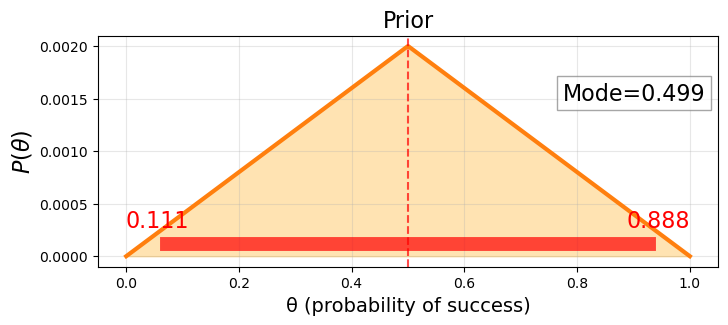

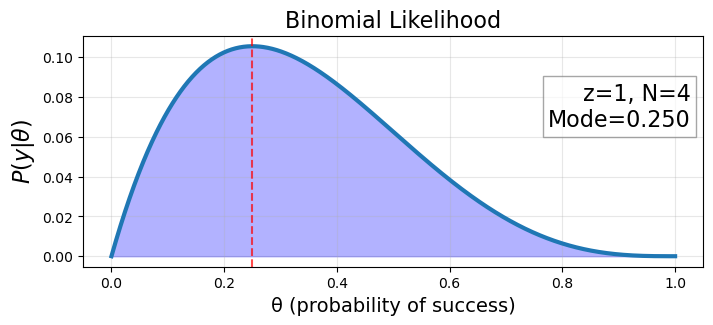

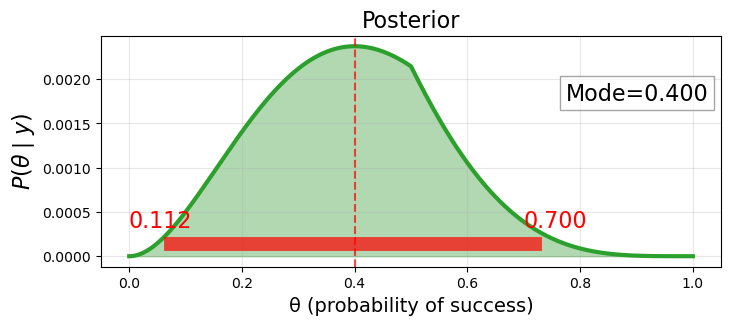

In [65]:
z=1
N=4
prior = triangular_prior(theta_values)
likelihood = binomial_likelihood(theta_values, z, N)
posterior = prior * likelihood
posterior = posterior / np.sum(posterior)  # Normalize

plot_prior(theta_values, prior, show_mode=True, show_hdi=True)
plot_likelihood(theta_values, z, N, show_mode=True)
plot_posterior(theta_values, prior, likelihood, show_mode=True, show_hdi=True)

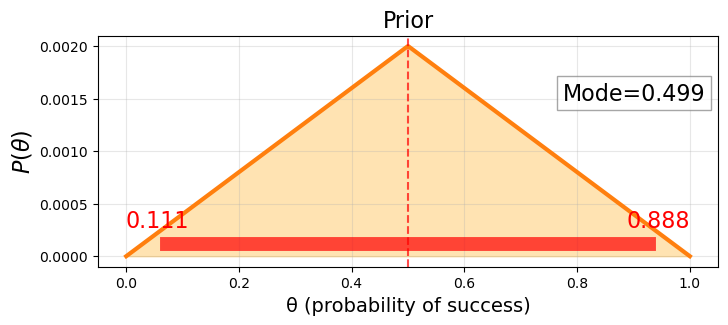

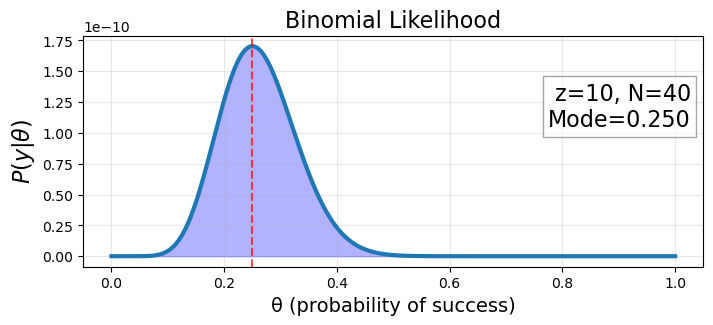

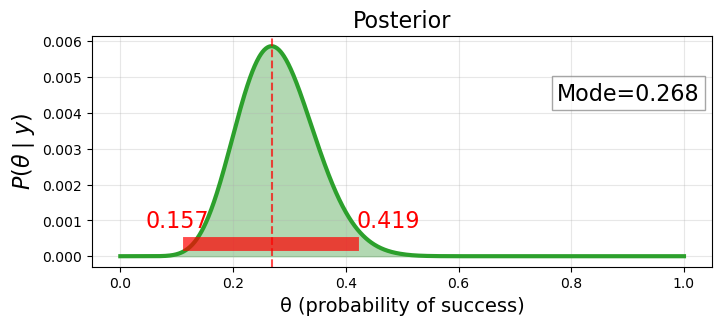

In [66]:
z=10
N=40
prior = triangular_prior(theta_values)
likelihood = binomial_likelihood(theta_values, z, N)
posterior = prior * likelihood
posterior = posterior / np.sum(posterior)  # Normalize

plot_prior(theta_values, prior, show_mode=True, show_hdi=True)
plot_likelihood(theta_values, z, N, show_mode=True)
plot_posterior(theta_values, prior, likelihood, show_mode=True, show_hdi=True)

(-0.2, 5.0)

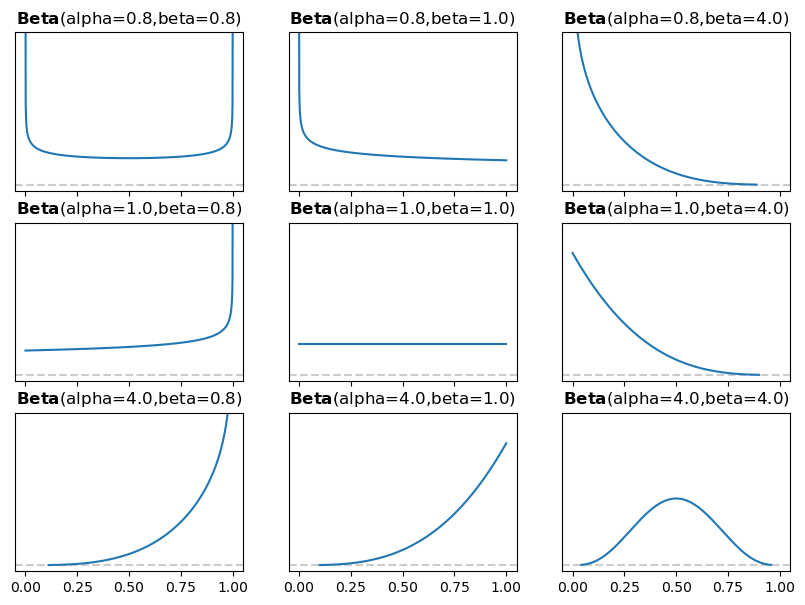

In [67]:
params = [0.8, 1, 4]

_, axes = plt.subplots(3, 3, figsize=(10, 7), sharex=True, sharey=True)
for i, alpha in enumerate(params):
    for j, beta in enumerate(params):
        pz.Beta(alpha, beta).plot_pdf(legend="title", ax=axes[i, j])
axes[0][0].set_ylim(-0.2, 5)

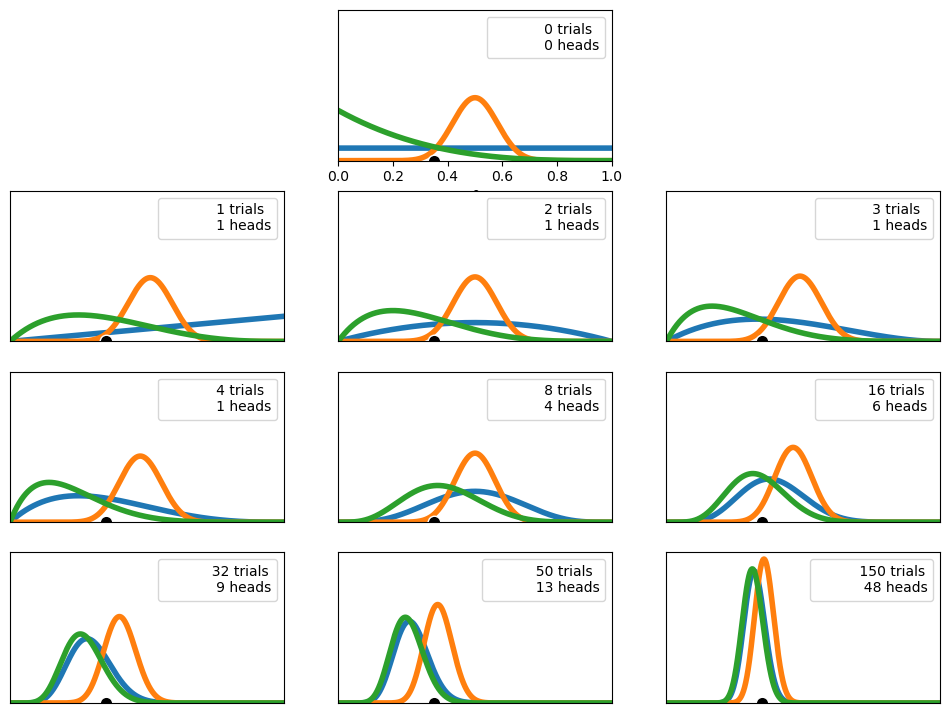

In [68]:
plt.figure(figsize=(12, 9))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
n_heads = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (20, 20), (1, 4)]
x = np.linspace(0, 1, 2000)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = n_heads[idx]
    for (α_prior, β_prior) in beta_params:
        posterior = pz.Beta(α_prior + y, β_prior + N - y).pdf(x)
        plt.plot(x, posterior, lw=4)

    plt.plot(theta_real, 0, ms=9, marker='o', mec='w', mfc='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])

(<Axes: >,
  message: Optimization terminated successfully
  success: True
   status: 0
      fun: 0.30105907080565064
        x: [ 2.475e+00  3.610e+00]
      nit: 9
      jac: [ 2.580e-03  1.028e-01]
     nfev: 29
     njev: 9)

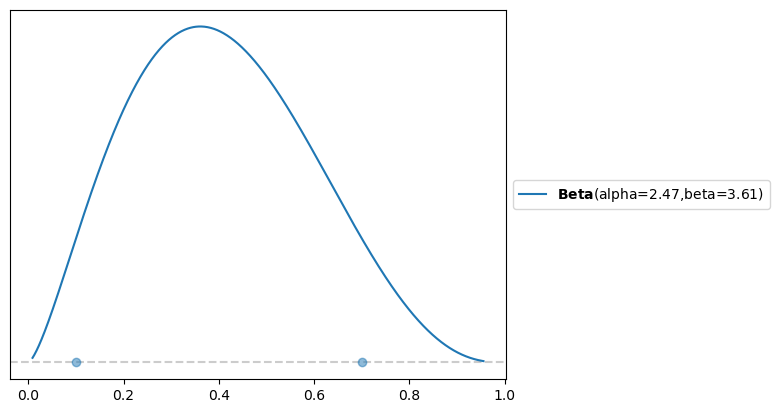

In [69]:
dist = pz.Beta()
pz.maxent(dist, 0.1, 0.7, 0.9)